In [7]:
import pandas as pd
import numpy as np

Load the built-in tips dataset from the seaborn library.


In [2]:
import seaborn as sns
tips = sns.load_dataset('tips')

A look at the first few rows of the tips dataset.


In [3]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Missing values check in the dataset ( count of missing values in each column).

In [4]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Summary statistics for the dataset.

In [5]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Data types of each column

In [6]:
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


convert categorical variables to a suitable format.


In [8]:
tips['sex'] = tips['sex'].astype('category').cat.codes
tips['smoker'] = tips['smoker'].astype('category').cat.codes
tips['day'] = tips['day'].astype('category').cat.codes
tips['time'] = tips['time'].astype('category').cat.codes


 outliers in the total_bill and tip columns.

In [9]:
print(tips['total_bill'].describe())
print(tips['tip'].describe())

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tips[['total_bill', 'tip']])
plt.show()

NameError: name 'plt' is not defined

ImportMatplotlib and run.


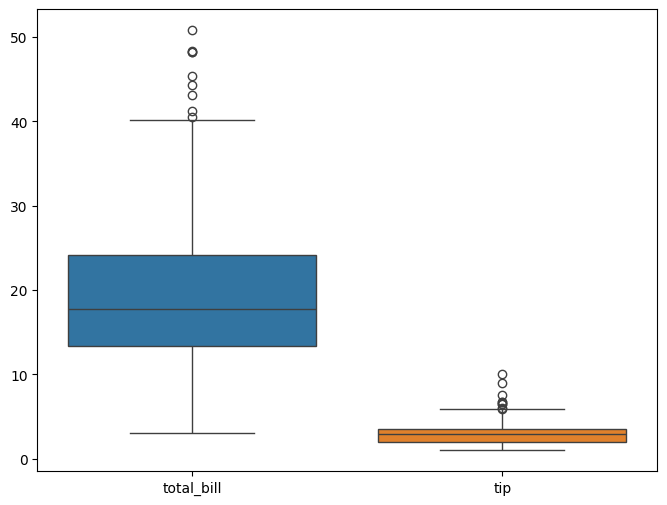

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=tips[['total_bill', 'tip']])
plt.show()

Based on boxplot, remove rows with extreme values (e.g., total bill > 50 or tip > 10).

In [12]:
tips = tips[(tips['total_bill'] < 50) & (tips['tip'] < 10)]


correlation between numerical columns.

In [13]:
print(tips[['total_bill', 'tip', 'size']].corr())

            total_bill       tip      size
total_bill    1.000000  0.654162  0.607489
tip           0.654162  1.000000  0.507650
size          0.607489  0.507650  1.000000


correlations using a heatmap

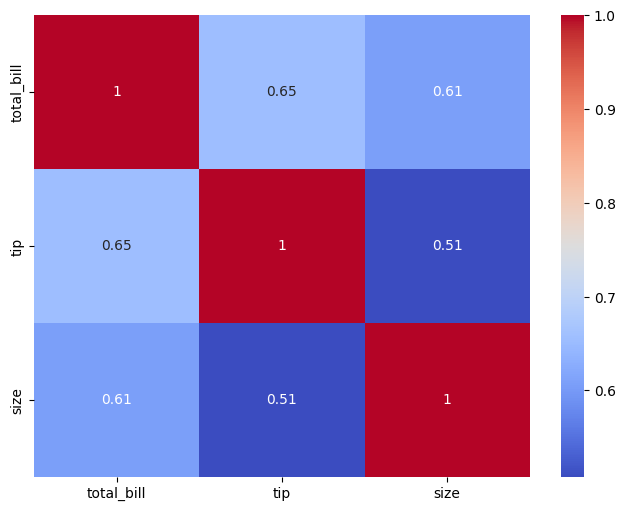

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(tips[['total_bill', 'tip', 'size']].corr(), annot=True, cmap='coolwarm')
plt.show()

create a new feature: tip_percentage.


In [15]:
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100

factors affect tip percentage

In [16]:
print(tips.groupby('sex')['tip_percentage'].mean())
print(tips.groupby('smoker')['tip_percentage'].mean())
print(tips.groupby('day')['tip_percentage'].mean())
print(tips.groupby('time')['tip_percentage'].mean())

sex
0    15.739951
1    16.649074
Name: tip_percentage, dtype: float64
smoker
0    16.283066
1    15.932846
Name: tip_percentage, dtype: float64
day
0    16.127563
1    16.991303
2    15.264404
3    16.689729
Name: tip_percentage, dtype: float64
time
0    16.412793
1    15.930468
Name: tip_percentage, dtype: float64


 visualize these relationships using boxplots


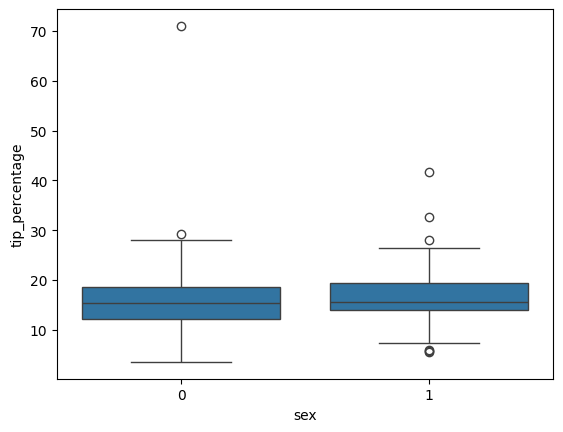

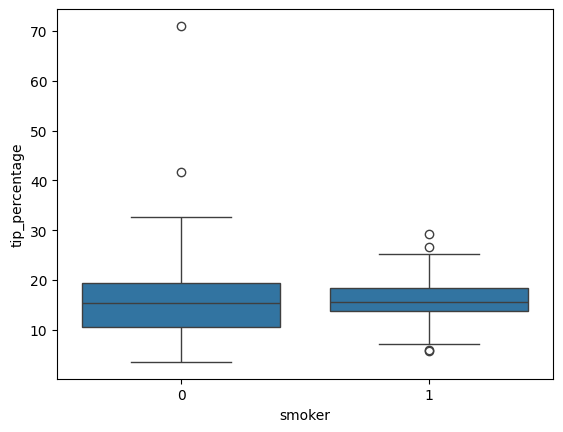

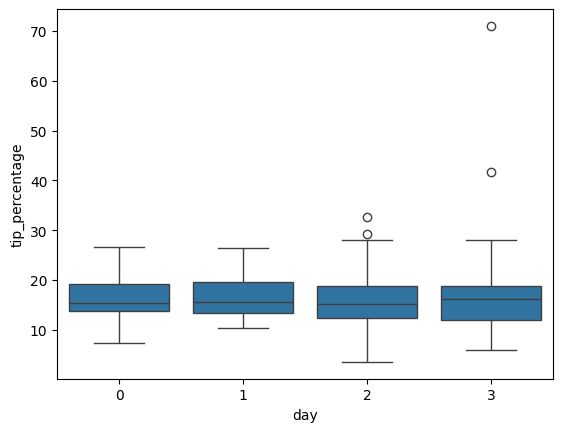

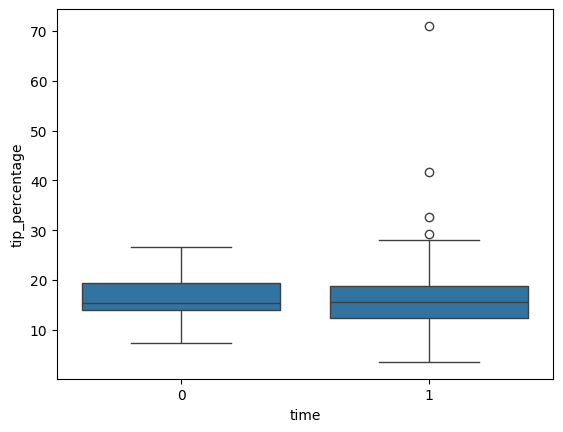

In [17]:
sns.boxplot(data=tips, x='sex', y='tip_percentage')
plt.show()

sns.boxplot(data=tips, x='smoker', y='tip_percentage')
plt.show()

sns.boxplot(data=tips, x='day', y='tip_percentage')
plt.show()

sns.boxplot(data=tips, x='time', y='tip_percentage')
plt.show()

Hypothesis Testing: "The average tip percentage is higher for males than females."
- Null hypothesis (H0): μ_male ≤ μ_female (The average tip percentage for males is less than or equal to that of females.)
- Alternative hypothesis (H1): μ_male > μ_female (The average tip percentage for males is greater than that of females.)


Calculate the average tip percentages


In [18]:
male_tips = tips[tips['sex'] == 1]['tip_percentage']
female_tips = tips[tips['sex'] == 0]['tip_percentage']

print(f"Male average tip percentage: {male_tips.mean()}")
print(f"Female average tip percentage: {female_tips.mean()}")

Male average tip percentage: 16.649073632892478
Female average tip percentage: 15.739951428477525


Perform the t-test

In [19]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(male_tips, female_tips)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 1.111540778622999
P-value: 0.26744328995042516


Since the p-value (0.267) is greater than 0.05, we fail to reject the null hypothesis.

This suggests that there is no statistically significant difference in average tip percentages between males and females in the dataset.
